# Business Understanding

## 1) Overview 
This project aims to develop a personalized movie recommendation system by leveraging a dataset containing movie information, user ratings, and interactions. The system will utilize content-based and collaborative filtering techniques to suggest movies to users based on their preferences and past interactions. 
 Modules for movie and user profiling will be developed to analyze movie attributes and user preferences, respectively. Evaluation and optimization will be conducted to enhance the accuracy
 Furthermore, leveraging movie metadata, user ratings, and collaborative filtering algorithms, the system provides personalized movie recommendations to enhance the user's movie-watching experience.


## 1.1)Introduction
- TMDB is a popular database that provides comprehensive information about movies,that contains the following titles, release dates, genres,cast and crew information. Credit information is given as well about the cast and crew information whereby the cast and crew are invoved in each movie. With the combination of the datasets, we gain valuable insights and perform variious analyses related to the movie industry

## 1.2) Problem Statement

- The movie industry is vast and fast evolving , with countless movies and movie sequels  released each year hence can be a challenge for the users to navigate through the vast amount of content and get to know which movies align with their preferences. 
- To ease this, or rather improve the users' experience, we come up withh a recommendation system that provides personalized movie recommendations based on user preferences and similarities with other users, and also aim to improve user satisfaction, increase user engagement, which ultimately drive user's retention on the platform.

## 1.3) Objectives

### 1.3.1) General  Objectives
- Develop a recommendation system that leverages user data and movie information to provide personalized movie recommendations.
Incorporate user preferences, including movie genres, ratings, and historical interactions, to generate relevant and engaging recommendations.
- Implement different recommendation techniques, such as collaborative filtering and content-based filtering, to ensure a diverse and accurate set of movie recommendations.
- To develop a movie recommendation system based on movie attributes, user ratings, and user interactions. The dataset consists of movie information such as title, cast, crew, budget, genres, keywords, language, revenue, and other relevant attributes. The objective is to leverage this data to build a recommendation system that can suggest movies to users based on their preferences and past interactions.

### 1.4 Data Understanding
 * Columns Understanding:

- id: Unique identifier for each movie
- title: Title of the movie
- cast: List of actors/actresses in the movie
- crew: List of crew members involved in the movie
- budget: Budget of the movie
- genres: List of genres associated with the movie
- homepage: Website URL of the movie
- keywords: List of keywords associated with the movie
- original_language: Original language of the movie
- original_title: Original title of the movie
- production_companies: List of production companies involved in the movie
- production_countries: List of countries where the movie was produced
- release_date: Release date of the movie
- revenue: Revenue generated by the movie
- runtime: Duration of the movie in minutes
- spoken_languages: List of languages spoken in the movie
- status: Current status of the movie (e.g., Released, Post Production)
- tagline: Tagline or slogan of the movie
- vote_average: Average vote rating for the movie
- vote_count: Number of votes received by the movie
- tags: List of tags associated with the movie

#### Import/ Load the libraries required

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import ast

from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.metrics.pairwise import linear_kernel
from sklearn.metrics.pairwise import cosine_similarity

from surprise import SVD, Reader, Dataset 
from surprise.model_selection import cross_validate


from my_functions import DatasetInfo, movie_score

### Load the Datasets 
 >- Movie Credits Dataset 

In [2]:
tmdb_movie_credits = pd.read_csv(r"C:\Users\rianm\Documents\data science\Recommendation System\Movie_Recomendation\.data\tmdb_5000_credits.csv")
tmdb_movie_credits

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."
...,...,...,...,...
4798,9367,El Mariachi,"[{""cast_id"": 1, ""character"": ""El Mariachi"", ""c...","[{""credit_id"": ""52fe44eec3a36847f80b280b"", ""de..."
4799,72766,Newlyweds,"[{""cast_id"": 1, ""character"": ""Buzzy"", ""credit_...","[{""credit_id"": ""52fe487dc3a368484e0fb013"", ""de..."
4800,231617,"Signed, Sealed, Delivered","[{""cast_id"": 8, ""character"": ""Oliver O\u2019To...","[{""credit_id"": ""52fe4df3c3a36847f8275ecf"", ""de..."
4801,126186,Shanghai Calling,"[{""cast_id"": 3, ""character"": ""Sam"", ""credit_id...","[{""credit_id"": ""52fe4ad9c3a368484e16a36b"", ""de..."


>-Movies Dataset

In [3]:
tmdb_movies = pd.read_csv(r"C:\Users\rianm\Documents\data science\Recommendation System\Movie_Recomendation\.data\tmdb_5000_movies.csv")
tmdb_movies

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4798,220000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",NaN,9367,"[{""id"": 5616, ""name"": ""united states\u2013mexi...",es,El Mariachi,El Mariachi just wants to play his guitar and ...,14.269792,"[{""name"": ""Columbia Pictures"", ""id"": 5}]","[{""iso_3166_1"": ""MX"", ""name"": ""Mexico""}, {""iso...",1992-09-04,2040920,81.0,"[{""iso_639_1"": ""es"", ""name"": ""Espa\u00f1ol""}]",Released,"He didn't come looking for trouble, but troubl...",El Mariachi,6.6,238
4799,9000,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 10749, ""...",NaN,72766,[],en,Newlyweds,A newlywed couple's honeymoon is upended by th...,0.642552,[],[],2011-12-26,0,85.0,[],Released,A newlywed couple's honeymoon is upended by th...,Newlyweds,5.9,5
4800,0,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 18, ""nam...",http://www.hallmarkchannel.com/signedsealeddel...,231617,"[{""id"": 248, ""name"": ""date""}, {""id"": 699, ""nam...",en,"Signed, Sealed, Delivered","""Signed, Sealed, Delivered"" introduces a dedic...",1.444476,"[{""name"": ""Front Street Pictures"", ""

### Merge the Datasets
* To avoid overlapping of the tilte columns we drop because we already have the title in the movie dataset 

In [4]:
# Drop the Title column in Movies Dataset
tmdb_movies.drop(['title'], axis = 1, inplace = True )

In [5]:
# Identify the columns that are coomon and need to be merged 
tmdb_movie_credits.columns=['id', 'title', 'cast', 'crew']

In [6]:
movies_credits = pd.merge(tmdb_movie_credits, tmdb_movies, on = 'id')
movies_credits.head()

,id,title,cast,crew,budget,genres,homepage,keywords,original_language,original_title,...,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,vote_average,vote_count
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de...",237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,...,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,7.2,11800
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de...",300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,...,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",6.9,4500
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de...",245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,...,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,6.3,4466
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de...",250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,...,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,7.6,9106
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de...",260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,...,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",6.1,2124


#### Finding the Shape of the datasets:
- Info 
- Columns, Column Names
- Datatypes
- Statistcics 

In [7]:
data_info = DatasetInfo(movies_credits)
print(data_info)

In [8]:
data_info.check_dataset_info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    4803 non-null   int64  
 1   title                 4803 non-null   object 
 2   cast                  4803 non-null   object 
 3   crew                  4803 non-null   object 
 4   budget                4803 non-null   int64  
 5   genres                4803 non-null   object 
 6   homepage              1712 non-null   object 
 7   keywords              4803 non-null   object 
 8   original_language     4803 non-null   object 
 9   original_title        4803 non-null   object 
 10  overview              4800 non-null   object 
 11  popularity            4803 non-null   float64
 12  production_companies  4803 non-null   object 
 13  production_countries  4803 non-null   object 
 14  release_date          4802 non-null   object 
 15  revenue              

In [9]:
data_info.check_dataset_shape()

Dataset shape: (4803, 22)


In [10]:
data_info.get_dataset_statistics_describe()

,id,budget,popularity,revenue,runtime,vote_average,vote_count
count,4803.000000,4.803000e+03,4803.000000,4.803000e+03,4801.000000,4803.000000,4803.000000
mean,57165.484281,2.904504e+07,21.492301,8.226064e+07,106.875859,6.092172,690.217989
std,88694.614033,4.072239e+07,31.816650,1.628571e+08,22.611935,1.194612,1234.585891
min,5.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,9014.500000,7.900000e+05,4.668070,0.000000e+00,94.000000,5.600000,54.000000
50%,14629.000000,1.500000e+07,12.921594,1.917000e+07,103.000000,6.200000,235.000000
75%,58610.500000,4.000000e+07,28.313505,9.291719e+07,118.000000,6.800000,737.000000
max,459488.000000,3.800000e+08,875.581305,2.787965e+09,338.000000,10.000000,13752.000000


In [11]:
movies_credits.duplicated().sum()

0

In [12]:
movies_credits.isnull().sum()

id                         0
title                      0
cast                       0
crew                       0
budget                     0
genres                     0
homepage                3091
keywords                   0
original_language          0
original_title             0
overview                   3
popularity                 0
production_companies       0
production_countries       0
release_date               1
revenue                    0
runtime                    2
spoken_languages           0
status                     0
tagline                  844
vote_average               0
vote_count                 0
dtype: int64

In [13]:
# For the genres column we have to conevrt it but firts we have to implement 
movies_credits.iloc[0].genres


'[{"id": 28, "name": "Action"}, {"id": 12, "name": "Adventure"}, {"id": 14, "name": "Fantasy"}, {"id": 878, "name": "Science Fiction"}]'

In [14]:
# =movies_credits['genres'].apply(convert)
movies_credits['genres'] = movies_credits['genres'].apply(data_info.convert)


In [15]:
movies_credits.head()

,id,title,cast,crew,budget,genres,homepage,keywords,original_language,original_title,...,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,vote_average,vote_count
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de...",237000000,"[Action, Adventure, Fantasy, Science Fiction]",http://www.avatarmovie.com/,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,...,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,7.2,11800
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de...",300000000,"[Adventure, Fantasy, Action]",http://disney.go.com/disneypictures/pirates/,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,...,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",6.9,4500
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de...",245000000,"[Action, Adventure, Crime]",http://www.sonypictures.com/movies/spectre/,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,...,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,6.3,4466
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de...",250000000,"[Action, Crime, Drama, Thriller]",http://www.thedarkknightrises.com/,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,...,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,7.6,9106
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de...",260000000,"[Action, Adventure, Science Fiction]",http://movies.disney.com/john-carter,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,...,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",6.1,2124


In [16]:
# Convert the Keywords as well
movies_credits['keywords']=movies_credits['keywords'].apply(data_info.convert)


In [17]:
movies_credits

,id,title,cast,crew,budget,genres,homepage,keywords,original_language,original_title,...,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,vote_average,vote_count
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de...",237000000,"[Action, Adventure, Fantasy, Science Fiction]",http://www.avatarmovie.com/,"[culture clash, future, space war, space colon...",en,Avatar,...,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,7.2,11800
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de...",300000000,"[Adventure, Fantasy, Action]",http://disney.go.com/disneypictures/pirates/,"[ocean, drug abuse, exotic island, east india ...",en,Pirates of the Caribbean: At World's End,...,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",6.9,4500
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de...",245000000,"[Action, Adventure, Crime]",http://www.sonypictures.com/movies/spectre/,"[spy, based on novel, secret agent, sequel, mi...",en,Spectre,...,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,6.3,4466
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de...",250000000,"[Action, Crime, Drama, Thriller]",http://www.thedarkknightrises.com/,"[dc comics, crime fighter, terrorist, secret i...",en,The Dark Knight Rises,...,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,7.6,9106
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de...",260000000,"[Action, Adventure, Science Fiction]",http://movies.disney.com/john-carter,"[based on novel, mars, medallion, space travel...",en,John Carter,...,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",6.1,2124
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4798,9367,El Mariachi,"[{""cast_id"": 1, ""character"": ""El Mariachi"", ""c...","[{""credit_id"": ""52fe44eec3a36847f80b280b"", ""de...",220000,"[Action, Crime, Thriller]",NaN,"[united states–mexico barrier, legs, arms, pap...",es,El Mariachi,...,"[{""name"": ""Columbia Pictures"", ""id"": 5}]","[{""iso_3166_1"": ""MX"", ""name"": ""Mexico""}, {""iso...",1992-09-04,2040920,81.0,"[{""iso_639_1"": ""es"", ""name"": ""Espa\u00f1ol""}]",Released,"He didn't come looking for trouble, but troubl...",6.6,238
4799,72766,Newlyweds,"[{""cast_id"": 1, ""character"": ""Buzzy"", ""credit_...","[{""credit_id"": ""52fe487dc3a368484e0fb013"", ""de...",9000,"[Comedy, Romance]",NaN,[],en,Newlyweds,...,[],[],2011-12-26,0,85.0,[],Released,A newlywed couple's honeymoon is upended by th...,5.9,5
4800,231617,"Signed, Sealed, Delivered","[{""cast_id"": 8, ""character"": ""Oliver O\u2019To...","[{""credit_id"": ""52fe4df3c3a36847f8275ecf"", ""de...",0,"[Com

In [18]:
movies_credits['cast'] = movies_credits['cast'].apply(data_info.convert3)


In [19]:
movies_credits

,id,title,cast,crew,budget,genres,homepage,keywords,original_language,original_title,...,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,vote_average,vote_count
0,19995,Avatar,"[Sam Worthington, Zoe Saldana, Sigourney Weaver]","[{""credit_id"": ""52fe48009251416c750aca23"", ""de...",237000000,"[Action, Adventure, Fantasy, Science Fiction]",http://www.avatarmovie.com/,"[culture clash, future, space war, space colon...",en,Avatar,...,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,7.2,11800
1,285,Pirates of the Caribbean: At World's End,"[Johnny Depp, Orlando Bloom, Keira Knightley]","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de...",300000000,"[Adventure, Fantasy, Action]",http://disney.go.com/disneypictures/pirates/,"[ocean, drug abuse, exotic island, east india ...",en,Pirates of the Caribbean: At World's End,...,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",6.9,4500
2,206647,Spectre,"[Daniel Craig, Christoph Waltz, Léa Seydoux]","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de...",245000000,"[Action, Adventure, Crime]",http://www.sonypictures.com/movies/spectre/,"[spy, based on novel, secret agent, sequel, mi...",en,Spectre,...,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,6.3,4466
3,49026,The Dark Knight Rises,"[Christian Bale, Michael Caine, Gary Oldman]","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de...",250000000,"[Action, Crime, Drama, Thriller]",http://www.thedarkknightrises.com/,"[dc comics, crime fighter, terrorist, secret i...",en,The Dark Knight Rises,...,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,7.6,9106
4,49529,John Carter,"[Taylor Kitsch, Lynn Collins, Samantha Morton]","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de...",260000000,"[Action, Adventure, Science Fiction]",http://movies.disney.com/john-carter,"[based on novel, mars, medallion, space travel...",en,John Carter,...,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",6.1,2124
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4798,9367,El Mariachi,"[Carlos Gallardo, Jaime de Hoyos, Peter Marqua...","[{""credit_id"": ""52fe44eec3a36847f80b280b"", ""de...",220000,"[Action, Crime, Thriller]",NaN,"[united states–mexico barrier, legs, arms, pap...",es,El Mariachi,...,"[{""name"": ""Columbia Pictures"", ""id"": 5}]","[{""iso_3166_1"": ""MX"", ""name"": ""Mexico""}, {""iso...",1992-09-04,2040920,81.0,"[{""iso_639_1"": ""es"", ""name"": ""Espa\u00f1ol""}]",Released,"He didn't come looking for trouble, but troubl...",6.6,238
4799,72766,Newlyweds,"[Edward Burns, Kerry Bishé, Marsha Dietlein]","[{""credit_id"": ""52fe487dc3a368484e0fb013"", ""de...",9000,"[Comedy, Romance]",NaN,[],en,Newlyweds,...,[],[],2011-12-26,0,85.0,[],Released,A newlywed couple's honeymoon is upended by th...,5.9,5
4800,231617,"Signed, Sealed, Delivered","[Eric Mabius, Kristin Booth, Crystal Lowe]","[{""credit_id"": ""52fe4df3c3a36847f8275ecf"", ""de...",0,"[Comedy, Drama, Romance, TV Movie]",http://www.hallmarkchannel.com/signedsealeddel..

In [20]:
movies_credits['crew'] = movies_credits['crew'].apply(data_info.get_directors)


In [21]:
movies_credits

,id,title,cast,crew,budget,genres,homepage,keywords,original_language,original_title,...,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,vote_average,vote_count
0,19995,Avatar,"[Sam Worthington, Zoe Saldana, Sigourney Weaver]",[James Cameron],237000000,"[Action, Adventure, Fantasy, Science Fiction]",http://www.avatarmovie.com/,"[culture clash, future, space war, space colon...",en,Avatar,...,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,7.2,11800
1,285,Pirates of the Caribbean: At World's End,"[Johnny Depp, Orlando Bloom, Keira Knightley]",[Gore Verbinski],300000000,"[Adventure, Fantasy, Action]",http://disney.go.com/disneypictures/pirates/,"[ocean, drug abuse, exotic island, east india ...",en,Pirates of the Caribbean: At World's End,...,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",6.9,4500
2,206647,Spectre,"[Daniel Craig, Christoph Waltz, Léa Seydoux]",[Sam Mendes],245000000,"[Action, Adventure, Crime]",http://www.sonypictures.com/movies/spectre/,"[spy, based on novel, secret agent, sequel, mi...",en,Spectre,...,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,6.3,4466
3,49026,The Dark Knight Rises,"[Christian Bale, Michael Caine, Gary Oldman]",[Christopher Nolan],250000000,"[Action, Crime, Drama, Thriller]",http://www.thedarkknightrises.com/,"[dc comics, crime fighter, terrorist, secret i...",en,The Dark Knight Rises,...,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,7.6,9106
4,49529,John Carter,"[Taylor Kitsch, Lynn Collins, Samantha Morton]",[Andrew Stanton],260000000,"[Action, Adventure, Science Fiction]",http://movies.disney.com/john-carter,"[based on novel, mars, medallion, space travel...",en,John Carter,...,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",6.1,2124
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4798,9367,El Mariachi,"[Carlos Gallardo, Jaime de Hoyos, Peter Marqua...",[Robert Rodriguez],220000,"[Action, Crime, Thriller]",NaN,"[united states–mexico barrier, legs, arms, pap...",es,El Mariachi,...,"[{""name"": ""Columbia Pictures"", ""id"": 5}]","[{""iso_3166_1"": ""MX"", ""name"": ""Mexico""}, {""iso...",1992-09-04,2040920,81.0,"[{""iso_639_1"": ""es"", ""name"": ""Espa\u00f1ol""}]",Released,"He didn't come looking for trouble, but troubl...",6.6,238
4799,72766,Newlyweds,"[Edward Burns, Kerry Bishé, Marsha Dietlein]",[Edward Burns],9000,"[Comedy, Romance]",NaN,[],en,Newlyweds,...,[],[],2011-12-26,0,85.0,[],Released,A newlywed couple's honeymoon is upended by th...,5.9,5
4800,231617,"Signed, Sealed, Delivered","[Eric Mabius, Kristin Booth, Crystal Lowe]",[Scott Smith],0,"[Comedy, Drama, Romance, TV Movie]",http://www.hallmarkchannel.com/signedsealeddel...,"[date, love at first sight, narration, investi...",en,"Signed, Sealed, Delivered",...,"[{""name"": ""Front Street Pictures"", ""id"": 3958}...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2013-10-13,0,120.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,NaN,7.0,6
4801,126186,Shanghai Calling,"

In [22]:
movies_credits['overview'] = movies_credits['overview'].apply(lambda x: x.split() if isinstance(x, str) else np.nan)


In [23]:
movies_credits

,id,title,cast,crew,budget,genres,homepage,keywords,original_language,original_title,...,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,vote_average,vote_count
0,19995,Avatar,"[Sam Worthington, Zoe Saldana, Sigourney Weaver]",[James Cameron],237000000,"[Action, Adventure, Fantasy, Science Fiction]",http://www.avatarmovie.com/,"[culture clash, future, space war, space colon...",en,Avatar,...,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,7.2,11800
1,285,Pirates of the Caribbean: At World's End,"[Johnny Depp, Orlando Bloom, Keira Knightley]",[Gore Verbinski],300000000,"[Adventure, Fantasy, Action]",http://disney.go.com/disneypictures/pirates/,"[ocean, drug abuse, exotic island, east india ...",en,Pirates of the Caribbean: At World's End,...,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",6.9,4500
2,206647,Spectre,"[Daniel Craig, Christoph Waltz, Léa Seydoux]",[Sam Mendes],245000000,"[Action, Adventure, Crime]",http://www.sonypictures.com/movies/spectre/,"[spy, based on novel, secret agent, sequel, mi...",en,Spectre,...,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,6.3,4466
3,49026,The Dark Knight Rises,"[Christian Bale, Michael Caine, Gary Oldman]",[Christopher Nolan],250000000,"[Action, Crime, Drama, Thriller]",http://www.thedarkknightrises.com/,"[dc comics, crime fighter, terrorist, secret i...",en,The Dark Knight Rises,...,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,7.6,9106
4,49529,John Carter,"[Taylor Kitsch, Lynn Collins, Samantha Morton]",[Andrew Stanton],260000000,"[Action, Adventure, Science Fiction]",http://movies.disney.com/john-carter,"[based on novel, mars, medallion, space travel...",en,John Carter,...,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",6.1,2124
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4798,9367,El Mariachi,"[Carlos Gallardo, Jaime de Hoyos, Peter Marqua...",[Robert Rodriguez],220000,"[Action, Crime, Thriller]",NaN,"[united states–mexico barrier, legs, arms, pap...",es,El Mariachi,...,"[{""name"": ""Columbia Pictures"", ""id"": 5}]","[{""iso_3166_1"": ""MX"", ""name"": ""Mexico""}, {""iso...",1992-09-04,2040920,81.0,"[{""iso_639_1"": ""es"", ""name"": ""Espa\u00f1ol""}]",Released,"He didn't come looking for trouble, but troubl...",6.6,238
4799,72766,Newlyweds,"[Edward Burns, Kerry Bishé, Marsha Dietlein]",[Edward Burns],9000,"[Comedy, Romance]",NaN,[],en,Newlyweds,...,[],[],2011-12-26,0,85.0,[],Released,A newlywed couple's honeymoon is upended by th...,5.9,5
4800,231617,"Signed, Sealed, Delivered","[Eric Mabius, Kristin Booth, Crystal Lowe]",[Scott Smith],0,"[Comedy, Drama, Romance, TV Movie]",http://www.hallmarkchannel.com/signedsealeddel...,"[date, love at first sight, narration, investi...",en,"Signed, Sealed, Delivered",...,"[{""name"": ""Front Street Pictures"", ""id"": 3958}...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2013-10-13,0,120.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,NaN,7.0,6
4801,126186,Shanghai Calling,"

In [24]:
movies_credits['genres']=movies_credits['genres'].apply(lambda x:[i.replace(" ","") for i in x])
movies_credits['keywords']=movies_credits['keywords'].apply(lambda x:[i.replace(" ","") for i in x])
movies_credits['crew']=movies_credits['crew'].apply(lambda x:[i.replace(" ","") for i in x])
movies_credits['cast']=movies_credits['cast'].apply(lambda x:[i.replace(" ","") for i in x])

In [25]:
movies_credits

,id,title,cast,crew,budget,genres,homepage,keywords,original_language,original_title,...,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,vote_average,vote_count
0,19995,Avatar,"[SamWorthington, ZoeSaldana, SigourneyWeaver]",[JamesCameron],237000000,"[Action, Adventure, Fantasy, ScienceFiction]",http://www.avatarmovie.com/,"[cultureclash, future, spacewar, spacecolony, ...",en,Avatar,...,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,7.2,11800
1,285,Pirates of the Caribbean: At World's End,"[JohnnyDepp, OrlandoBloom, KeiraKnightley]",[GoreVerbinski],300000000,"[Adventure, Fantasy, Action]",http://disney.go.com/disneypictures/pirates/,"[ocean, drugabuse, exoticisland, eastindiatrad...",en,Pirates of the Caribbean: At World's End,...,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",6.9,4500
2,206647,Spectre,"[DanielCraig, ChristophWaltz, LéaSeydoux]",[SamMendes],245000000,"[Action, Adventure, Crime]",http://www.sonypictures.com/movies/spectre/,"[spy, basedonnovel, secretagent, sequel, mi6, ...",en,Spectre,...,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,6.3,4466
3,49026,The Dark Knight Rises,"[ChristianBale, MichaelCaine, GaryOldman]",[ChristopherNolan],250000000,"[Action, Crime, Drama, Thriller]",http://www.thedarkknightrises.com/,"[dccomics, crimefighter, terrorist, secretiden...",en,The Dark Knight Rises,...,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,7.6,9106
4,49529,John Carter,"[TaylorKitsch, LynnCollins, SamanthaMorton]",[AndrewStanton],260000000,"[Action, Adventure, ScienceFiction]",http://movies.disney.com/john-carter,"[basedonnovel, mars, medallion, spacetravel, p...",en,John Carter,...,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",6.1,2124
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4798,9367,El Mariachi,"[CarlosGallardo, JaimedeHoyos, PeterMarquardt]",[RobertRodriguez],220000,"[Action, Crime, Thriller]",NaN,"[unitedstates–mexicobarrier, legs, arms, paper...",es,El Mariachi,...,"[{""name"": ""Columbia Pictures"", ""id"": 5}]","[{""iso_3166_1"": ""MX"", ""name"": ""Mexico""}, {""iso...",1992-09-04,2040920,81.0,"[{""iso_639_1"": ""es"", ""name"": ""Espa\u00f1ol""}]",Released,"He didn't come looking for trouble, but troubl...",6.6,238
4799,72766,Newlyweds,"[EdwardBurns, KerryBishé, MarshaDietlein]",[EdwardBurns],9000,"[Comedy, Romance]",NaN,[],en,Newlyweds,...,[],[],2011-12-26,0,85.0,[],Released,A newlywed couple's honeymoon is upended by th...,5.9,5
4800,231617,"Signed, Sealed, Delivered","[EricMabius, KristinBooth, CrystalLowe]",[ScottSmith],0,"[Comedy, Drama, Romance, TVMovie]",http://www.hallmarkchannel.com/signedsealeddel...,"[date, loveatfirstsight, narration, investigat...",en,"Signed, Sealed, Delivered",...,"[{""name"": ""Front Street Pictures"", ""id"": 3958}...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2013-10-13,0,120.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,NaN,7.0,6
4801,126186,Shanghai Calling,"[DanielHenney, ElizaCoupe, BillPaxt

In [26]:
movies_credits['tags'] = movies_credits['overview'] + movies_credits['genres'] + movies_credits['keywords'] + movies_credits['cast'] + movies_credits['crew']

In [27]:
movies_credits

,id,title,cast,crew,budget,genres,homepage,keywords,original_language,original_title,...,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,vote_average,vote_count,tags
0,19995,Avatar,"[SamWorthington, ZoeSaldana, SigourneyWeaver]",[JamesCameron],237000000,"[Action, Adventure, Fantasy, ScienceFiction]",http://www.avatarmovie.com/,"[cultureclash, future, spacewar, spacecolony, ...",en,Avatar,...,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,7.2,11800,"[In, the, 22nd, century,, a, paraplegic, Marin..."
1,285,Pirates of the Caribbean: At World's End,"[JohnnyDepp, OrlandoBloom, KeiraKnightley]",[GoreVerbinski],300000000,"[Adventure, Fantasy, Action]",http://disney.go.com/disneypictures/pirates/,"[ocean, drugabuse, exoticisland, eastindiatrad...",en,Pirates of the Caribbean: At World's End,...,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",6.9,4500,"[Captain, Barbossa,, long, believed, to, be, d..."
2,206647,Spectre,"[DanielCraig, ChristophWaltz, LéaSeydoux]",[SamMendes],245000000,"[Action, Adventure, Crime]",http://www.sonypictures.com/movies/spectre/,"[spy, basedonnovel, secretagent, sequel, mi6, ...",en,Spectre,...,"[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,6.3,4466,"[A, cryptic, message, from, Bond’s, past, send..."
3,49026,The Dark Knight Rises,"[ChristianBale, MichaelCaine, GaryOldman]",[ChristopherNolan],250000000,"[Action, Crime, Drama, Thriller]",http://www.thedarkknightrises.com/,"[dccomics, crimefighter, terrorist, secretiden...",en,The Dark Knight Rises,...,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,7.6,9106,"[Following, the, death, of, District, Attorney..."
4,49529,John Carter,"[TaylorKitsch, LynnCollins, SamanthaMorton]",[AndrewStanton],260000000,"[Action, Adventure, ScienceFiction]",http://movies.disney.com/john-carter,"[basedonnovel, mars, medallion, spacetravel, p...",en,John Carter,...,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",6.1,2124,"[John, Carter, is, a, war-weary,, former, mili..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4798,9367,El Mariachi,"[CarlosGallardo, JaimedeHoyos, PeterMarquardt]",[RobertRodriguez],220000,"[Action, Crime, Thriller]",NaN,"[unitedstates–mexicobarrier, legs, arms, paper...",es,El Mariachi,...,"[{""iso_3166_1"": ""MX"", ""name"": ""Mexico""}, {""iso...",1992-09-04,2040920,81.0,"[{""iso_639_1"": ""es"", ""name"": ""Espa\u00f1ol""}]",Released,"He didn't come looking for trouble, but troubl...",6.6,238,"[El, Mariachi, just, wants, to, play, his, gui..."
4799,72766,Newlyweds,"[EdwardBurns, KerryBishé, MarshaDietlein]",[EdwardBurns],9000,"[Comedy, Romance]",NaN,[],en,Newlyweds,...,[],2011-12-26,0,85.0,[],Released,A newlywed couple's honeymoon is upended by th...,5.9,5,"[A, newlywed, couple's, honeymoon, is, upended..."
4800,231617,"Signed, Sealed, Delivered","[EricMabius, KristinBooth, CrystalLowe]",[ScottSmith],0,"[Comedy, Drama, Romance, TVMovie]",http://www.hallmarkchannel.com/signedsealeddel...,"[date, loveatfirstsight, narration, investigat...",en,"Signed, Sealed, Delivered",...,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2013-10-13,0,120.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,NaN,7.0,6,"[""Signed,, Sealed,, Delivered"", introduces, a,..."
4801,126186,Shanghai Calling,"[DanielHenney, ElizaCoupe, Bil

## 3) EDA:
### Visualization

In [104]:
# Find the unique Genres


## Recommendation System 

####  i ) Demographic Recommendation based on Popularity 

##### Sort The movie/credits based on ratings and display the top movies: Improve accuracy of the recommendations 
- Create a metric to score or rate the movies.
- Calculate the score for each movie.
- Sort the scores and recommend the highest-rated movie to the users.

Implement the following Formula 

Weighted Rating (WR) = (vv+m.R) / (v+m)

Where:

v is the number of votes for the movie.
m is the minimum votes required to be listed in the chart.
R is the average rating of the movie.

In [ ]:
movies_credits['vote_average'].mean()

6.092171559442016

In [ ]:
# Determine the appropriate value of M
movies_credits['vote_count'].quantile(q=0.9)

1838.4000000000015

In [ ]:
# Filter and put them in a new dataframe
new_dataframe_filtered=movies_credits[movies_credits['vote_count']>movies_credits['vote_count'].quantile(q=0.9)]

In [ ]:
# Check the shape of the new dataframe
new_dataframe_filtered.shape

(481, 23)

In [ ]:
# Calculate score for each qualified movie
def movie_score(x):
    v=x['vote_count']
    m=movies_credits['vote_count'].quantile(q=0.9)
    R=x['vote_average']
    C=movies_credits['vote_average'].mean()
    return ((R*v)/(v+m))+((C*m)/(v+m))

In [ ]:
new_dataframe_filtered['score'] = new_dataframe_filtered.apply(movie_score, axis=1).copy()


<ipython-input-45-d388c2fb8239>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_dataframe_filtered['score'] = new_dataframe_filtered.apply(movie_score, axis=1).copy()


* The warning above is raised when you are trying to set a  value on a copy of a slice from the Pandas Dataframe
* As such we have .loc explicitly and one can set the values in the 'score column for the rows of the new dataframe 

In [ ]:
# We  solve the above warning by using the '.loc and set the new values
new_dataframe_filtered.loc[:, 'score'] = new_dataframe_filtered.apply(movie_score, axis=1)


In [ ]:
# We sort the filtered dataframe based on the score feature
new_highscore=new_dataframe_filtered.sort_values(by='score', ascending=False).head()
new_highscore[['title', 'vote_count','vote_average','popularity', 'score']]

,title,vote_count,vote_average,popularity,score
1881,The Shawshank Redemption,8205,8.5,136.747729,8.059258
662,Fight Club,9413,8.3,146.757391,7.939256
65,The Dark Knight,12002,8.2,187.322927,7.920020
3232,Pulp Fiction,8428,8.3,121.463076,7.904645
96,Inception,13752,8.1,167.583710,7.863239


####  Finding movie popularity 

In [ ]:
# Sort by the popularity column
popular_movies = movies_credits.sort_values('popularity', ascending = False).head()
popular_movies[['title', 'vote_count','vote_average','popularity']]

,title,vote_count,vote_average,popularity
546,Minions,4571,6.4,875.581305
95,Interstellar,10867,8.1,724.247784
788,Deadpool,10995,7.4,514.569956
94,Guardians of the Galaxy,9742,7.9,481.098624
127,Mad Max: Fury Road,9427,7.2,434.278564


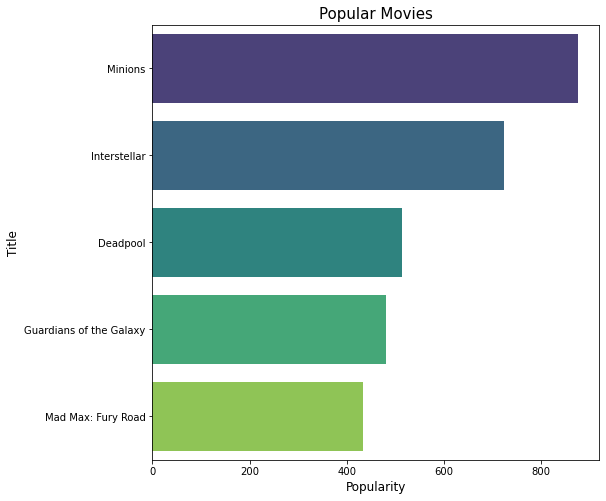

In [ ]:
plt.figure(figsize=(8, 8))
sns.barplot(x='popularity', y='title', data=popular_movies, palette='viridis')
plt.xlabel("Popularity", fontsize=12)
plt.ylabel("Title", fontsize=12)
plt.title("Popular Movies", fontsize=15)
plt.show()



* From the plot above we can see that the most popular movie is minions with a popularity rate of > 800; hence being highly recommended to be watched by the user/ rather recommend users to watch

In [ ]:
movie_rating= pd.read_csv(r"C:\Users\wanji\OneDrive\Desktop\ratings.csv")
movie_rating.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [ ]:
# Step 1: Calculate values for the formula
v = movies_credits['vote_count']
R = movies_credits['vote_average']
m = 1000  # Choose a minimum vote threshold

# Step 2: Compute weighted rating (WR)
C = movies_credits['vote_average'].mean()
WR = (v / (v + m) * R) + (m / (v + m) * C)

# Step 3: Add 'Weighted_Rating' column to DataFrame
movies_credits['Weighted_Rating'] = WR

# Step 4: Sort the DataFrame based on 'Weighted_Rating' column
sorted_movies = movies_credits.sort_values('Weighted_Rating', ascending=False)

# Step 5: Display top movies based on sorted results
top_movies = sorted_movies[['title', 'vote_average','genres', 'Weighted_Rating']].head(10)
top_movies

,title,vote_average,genres,Weighted_Rating
1881,The Shawshank Redemption,8.5,"[Drama, Crime]",8.238422
662,Fight Club,8.3,[Drama],8.087974
3232,Pulp Fiction,8.3,"[Thriller, Crime]",8.065822
3337,The Godfather,8.4,"[Drama, Crime]",8.065192
65,The Dark Knight,8.2,"[Drama, Action, Crime, Thriller]",8.037884
96,Inception,8.1,"[Action, Thriller, ScienceFiction, Mystery, Ad...",7.963894
809,Forrest Gump,8.2,"[Comedy, Drama, Romance]",7.963882
95,Interstellar,8.1,"[Adventure, Drama, ScienceFiction]",7.930806
1990,The Empire Strikes Back,8.2,"[Adventure, Action, ScienceFiction]",7.893585
1818,Schindler's List,8.3,"[Drama, History, War]",7.885696


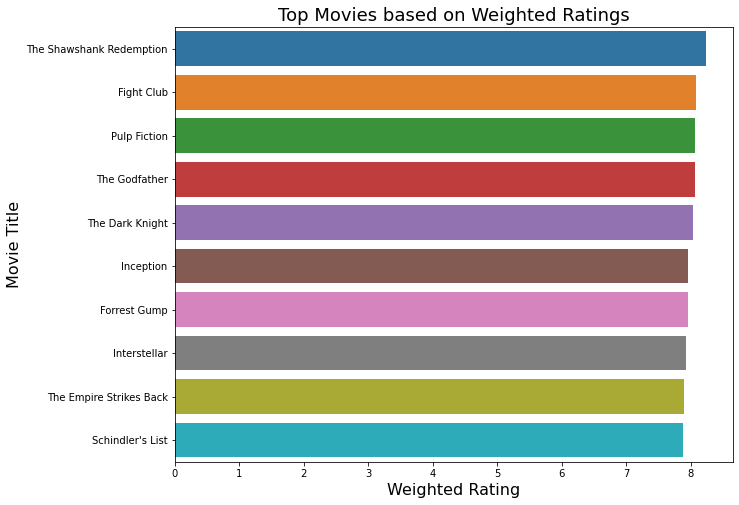

In [ ]:
# Step 6: Plot the data
fig, ax = plt.subplots(figsize=(10, 8))
sns.barplot(x=top_movies['Weighted_Rating'], y=top_movies['title'], ax=ax)
ax.set_xlabel('Weighted Rating', fontsize=16)
ax.set_ylabel('Movie Title', fontsize=16)
ax.set_title('Top Movies based on Weighted Ratings', fontsize=18)

plt.show()

## ii) Content Based

> For this recommendation system we build an engine that shows the similarity between movie based and the metrics new_dataframe_filtered.
> Secondly, this will be in two segments :
* Movie Overview
* Movie Cast , Keywords and Genre

* 1.ii)Movie Overview Recommendation
- We use this because provides a concise description of its storyline, theme, and main elements. It offers insights into the narrative and helps to understand the central idea or premise of the movie.
> We pair the similar scores of the movies based on the overview 

In [ ]:
movies_credits ['overview'].head()

# Finding the Nan values(missing values) with an empty string 

movies_credits['overview'].isnull().sum()# We know there 3 missing values hence we replace them

# Replacing the missing values
movies_credits['overview'].fillna('', inplace = True)

In [ ]:
# Confirm if there are Missing values
movies_credits['overview'].isnull().sum()

0

In [ ]:
# Convert the 'overview' column to string type
movies_credits['overview'] = movies_credits['overview'].apply(lambda x: ' '.join(x) if isinstance(x, list) else '')

##### In this case we implement the use of 'Term frequency-Inverse Documnet Frequency which is a numerical representation used to evaluate the key importance of the collection of documents. 
* It calculates the ratio of the number of times a term appears in a text

In [105]:
movie_rating

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931
...,...,...,...,...
100831,610,166534,4.0,1493848402
100832,610,168248,5.0,1493850091
100833,610,168250,5.0,1494273047
100834,610,168252,5.0,1493846352


In [ ]:
# Construct the TF-IDF Matrix
tfidfv=TfidfVectorizer(analyzer='word', stop_words='english')
tfidfv_matrix=tfidfv.fit_transform(movies_credits['overview'])
print(tfidfv_matrix.todense())
tfidfv_matrix.todense().shape

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


(4803, 20978)

####  Computing the same Score based on the movie Similiarities


In [ ]:
# In this case,  we 

## iii)  Collaborative Based Recommendation 

In [ ]:
from surprise import SVD, Reader, Dataset 
from surprise.model_selection import cross_validate